In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(file1)
clinical_df = pd.read_csv(file2)


# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")


# Display the data table for preview
merge_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = merge_df.groupby(["Drug", "Timepoint"]).mean()


# Convert to DataFrame
drug_group_df = pd.DataFrame(drug_group)

#drug_group_df = drug_group_df.drop("Metastatic Sites")

# Preview DataFrame
drug_group_df


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [43]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_group_df.shape

div = 20  #20 observations in each sample
lim = len(drug_group_df) // div  #number of samples should be 5
lim
samples = [drug_group_df.iloc[(i * div):(i * div + div),:] 
           for i in range(0, lim)]

# Calculate means
means = [s.mean() for s in samples]

# Calculate standard error on means
sem = [s.sem() for s in samples]

# Convert to DataFrame
sem_pd = pd.DataFrame(sem)

# Preview DataFrame
sem_pd

,Tumor Volume (mm3),Metastatic Sites
0,1.879494,0.175231
1,1.699372,0.206650
2,1.754266,0.230486
3,2.085680,0.184522
4,1.629375,0.197575


In [40]:
# Minor Data Munging to Re-Format the Data Frames

merge_df.head()
merge_df.columns
drug_group1_df = merge_df[["Timepoint", "Drug", "Tumor Volume (mm3)"]]

#transpose dataframe turing values in a row into column
#code from stack overflow
#https://stackoverflow.com/questions/49135606/transpose-only-one-level-of-a-pandas-multiindex-dataframe
drug_group1_df=(drug_group1_df.groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)']
                .first()
                .unstack(fill_value='')
                .rename_axis(None))



# Preview that Reformatting worked
drug_group1_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,45.651331,47.784682,46.716399,47.864440,47.242844,45.691124,48.786801,41.020518,47.313491,46.761164
10,43.270852,46.501476,47.953844,51.236606,48.167061,47.972927,51.745156,41.631247,47.904324,47.565674
15,43.784893,47.242929,49.159749,51.738706,51.453974,52.343085,51.325852,39.158001,48.735197,48.254248
20,42.731552,49.554263,51.909025,52.599206,55.496608,54.595705,55.326122,39.687832,51.112713,51.826638


In [44]:
# Generate the Plot (with Error Bars)


# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

<function matplotlib.pyplot.show(*args, **kw)>

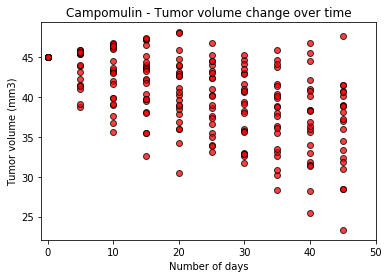

In [71]:
#Scatterplot Capomulin

df_Campomulin = merge_df[["Timepoint", "Drug", "Tumor Volume (mm3)"]]
df_Campomulin = df_Campomulin.loc[df_Campomulin["Drug"] == "Capomulin", :]




plt.scatter(df_Campomulin["Timepoint"], df_Campomulin["Tumor Volume (mm3)"], 
            marker="o", facecolors="red", edgecolors="black", alpha=0.75)

x_lim = merge_df["Timepoint"].max()
#y_lim = merge_df["Tumor Volume (mm3)"].max()
plt.xlim(-1, x_lim +5)
#plt.ylim(0, y_lim)


plt.title("Campomulin - Tumor volume change over time") 
plt.xlabel("Number of days") 
plt.ylabel("Tumor volume (mm3)")
plt.savefig("Campomulin_Scatter_Tumor_Volume.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

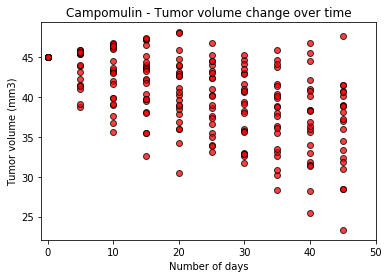

In [69]:
#Scatterplot Infubinol

df_Infubinol = merge_df[["Timepoint", "Drug", "Tumor Volume (mm3)"]]
df_Campomulin = df_Campomulin.loc[df_Campomulin["Drug"] == "Capomulin", :]




plt.scatter(df_Campomulin["Timepoint"], df_Campomulin["Tumor Volume (mm3)"], 
            marker="o", facecolors="red", edgecolors="black", alpha=0.75)

x_lim = merge_df["Timepoint"].max()
#y_lim = merge_df["Tumor Volume (mm3)"].max()
plt.xlim(-1, x_lim +5)
#plt.ylim(0, y_lim)


plt.title("Campomulin - Tumor volume change over time") 
plt.xlabel("Number of days") 
plt.ylabel("Tumor volume (mm3)")
plt.savefig("Campomulin_Scatter_Tumor_Volume.png")
plt.show
